In [47]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [48]:
# Loading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [49]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [50]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [52]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [54]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# data preprocessing

In [55]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset

import nltk
import re # Regular Expression
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [57]:
corpus[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

Creating the bag of words of model

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
count_vec = CountVectorizer(max_features=1500)

In [60]:
X = count_vec.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# Model Buildimg

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [64]:
#Predecting the test set results
ypredict = nb.predict(X_test)

In [65]:
# Acc ,Pre & Rec
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [66]:
print(accuracy_score(y_test, ypredict))

0.765


In [67]:
print(precision_score(y_test, ypredict))

0.7641509433962265


In [68]:
print(recall_score(y_test, ypredict))

0.7864077669902912


In [69]:
print(round(precision_score(y_test, ypredict), 3))

0.764


Making the confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_metrics = confusion_matrix(y_test,ypredict)

In [72]:
confusion_metrics

array([[72, 25],
       [22, 81]], dtype=int64)

plotting the confusion matrix

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

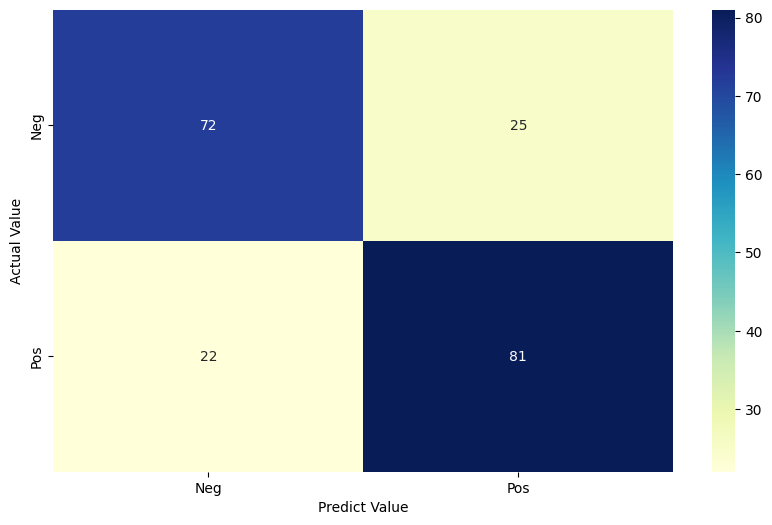

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_metrics, annot = True, cmap = "YlGnBu",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [75]:
#hyperparameter tuning the naive bayes classifier
accuracy = 0.0
alpha_value = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    temp_class = MultinomialNB(alpha=i)
    temp_class.fit(X_train, y_train)
    temp_ypredict = temp_class.predict(X_test)
    score = accuracy_score(y_test, temp_ypredict)
    print(round(i, 1), round(score*100, 2))
    
    if score > accuracy:
        accuracy = score
        alpha_value = i
        
print()
print(round(accuracy*100, 2), round(alpha_value, 1))

0.1 78.0
0.2 78.5
0.3 78.0
0.4 78.0
0.5 77.5
0.6 77.5
0.7 77.5
0.8 77.0
0.9 76.5
1.0 76.5

78.5 0.2


In [76]:
nb_class = MultinomialNB(alpha=0.2)
nb_class.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# Predictions

In [77]:
def predict_rev(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl  = " ", string = sample_review)
    
    sample_review = sample_review.lower()
    
    review_words = sample_review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words("english"))]
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    review = ' '.join(review)
    
    temp = count_vec.transform([review]).toarray()
    
    return nb_class.predict(temp)

In [78]:
sample_text = "The food is really fantastic"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Pos review


In [79]:
sample_text = "The food is really bad"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Neg review
